<a href="https://colab.research.google.com/github/Stergios-Konstantinidis/CAA/blob/main/functions_and_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and verbose

In [ ]:
import requests
import json
import time as zzz
import pandas
import random
import numpy
from datetime import datetime, timedelta, time

from google.colab import auth
auth.authenticate_user()
print('Authenticated')


from google.cloud import bigquery
# Construct a BigQuery client object.
project_id = 'sbb-project-2023'
client = bigquery.Client(project = project_id)



verboser = True

def verbose(text:str, verboser = verboser):
  if verboser == True:
    print(text)
  else:
    pass



Authenticated


# SQL functions

In [ ]:
def send_beverage_served(user_id, beverage_id):
  table_id = 'projetalcohol.beverage_served'
  to_load = """{"campus_card_idcampus_card":"***","beverage_idbeverage":"****","beverage_serveddate":"*****","beverage_servedtime":"******"}"""
  to_load = to_load.replace("******", str((datetime.now() + timedelta(hours=2)).strftime('%H:%M')+":00.00"))
  to_load = to_load.replace("*****", (datetime.now() + timedelta(hours=2)).strftime('%Y-%m-%d'))
  to_load = to_load.replace("****", str(beverage_id))
  rows_to_insert = [json.loads(to_load.replace("***", user_id))]

  errors = client.insert_rows_json(table_id, rows_to_insert)  # Make an API request.
  if errors == []:
    verbose("New rows have been added.")
  else:
    verbose("Encountered errors while inserting rows in beverage served: {}".format(errors))

#send_beverage_served("8843d61d0", 2938)

In [ ]:
def send_alcohol_level(user_id, alcohol_level):
  table_id = 'projetalcohol.alcohol_level'
  to_load = """{"campus_card_idcampus_card":"***","alcohol_leveldate":"*****","alcohol_leveltime":"******","alcohol_levelethanol":"****"}"""
  to_load = to_load.replace("******", str((datetime.now() + timedelta(hours=2)).strftime('%H:%M:%S')))
  to_load = to_load.replace("*****", (datetime.now() + timedelta(hours=2)).strftime('%Y-%m-%d'))
  to_load = to_load.replace("****", str(alcohol_level))
  rows_to_insert = [json.loads(to_load.replace("***", user_id))]

  errors = client.insert_rows_json(table_id, rows_to_insert)  # Make an API request.
  if errors == []:
    verbose("New rows have been added.")
  else:
    verbose("Encountered errors while inserting rows in alcohol level: {}".format(errors))

#send_alcohol_level("testuser", str(7000))

In [ ]:
def add_time_departure(campus_card_uid, departure_time = "18:00"):
  table_id = 'projetalcohol.time_departure'
  to_load = """{"campus_card_idcampus_card":"***","time_departuredate":"*****","time_departuretime":"******"}"""
  to_load = to_load.replace("******", str(datetime.strptime(departure_time,'%H:%M').strftime('%H:%M:%S')))
  to_load = to_load.replace("*****", (datetime.now()).strftime('%Y-%m-%d'))
  rows_to_insert = [json.loads(to_load.replace("***", campus_card_uid))]

  errors = client.insert_rows_json(table_id, rows_to_insert)  # Make an API request.
  if errors == []:
    verbose("New rows have been added.")
  else:
    verbose("Encountered errors while inserting rows in alcohol level: {}".format(errors))

#add_time_departure("8843d61d0")

In [ ]:
def create_user(idcampus_card, campus_cardlastname = "newlastname", campus_cardfirstname = "newfirstname", campus_cardbirth_date = datetime.strptime("1998.10.03", "%Y.%m.%d"), campus_cardabsorption = 4, campus_cardsex = True, campus_cardweight = 70,campus_carddiffusioncoef = 0,alcohol_authorized = 0):
  table_id = 'projetalcohol.campus_card'
  to_load = """{"idcampus_card":"***","campus_cardlastname":"****","campus_cardfirstname":"*****","campus_cardbirth_date":"******","campus_cardabsorption":"*******","campus_cardsex":"********","campus_cardweight":"*********","campus_carddiffusioncoef":"**********","alcohol_limit":"***********"}"""
  to_load = to_load.replace("***********", str(alcohol_authorized))
  to_load = to_load.replace("**********", str(campus_carddiffusioncoef))
  to_load = to_load.replace("*********", str(campus_cardweight))
  to_load = to_load.replace("********", str(campus_cardsex))
  to_load = to_load.replace("*******", str(campus_cardabsorption))
  to_load = to_load.replace("******", str(campus_cardbirth_date.strftime('%Y-%m-%d')))
  to_load = to_load.replace("*****", campus_cardfirstname)
  to_load = to_load.replace("****", campus_cardlastname)
  rows_to_insert = [json.loads(to_load.replace("***", idcampus_card))]

  errors = client.insert_rows_json(table_id, rows_to_insert)  # Make an API request.
  add_time_departure(idcampus_card)
  if errors == []:
    verbose("New rows have been added.")
  else:
    verbose("Encountered errors while inserting rows in alcohol level: {}".format(errors))

#create_user("UID", "Test", "user", datetime.strptime("1998.10.03", "%Y.%m.%d"),4,True,83,1)


In [ ]:
def user_exists(campuscard_id):
  q1 = """select idcampus_card as campuscard
from sbb-project-2023.projetalcohol.campus_card
where idcampus_card = "{}"
limit 1""".format(campuscard_id)
  query_job = client.query(q1)
  if len(query_job.to_dataframe()['campuscard'].tolist()) == 0:
    return False
  else:
    return True

#user_exists("8843d61d0")

In [ ]:
def create_drink(beverage_name, alcohol_level_percentage, beverage_quantity_cL = 300, beverage_id = random.randrange(2000000)):
  table_id = 'projetalcohol.beverage'
  to_load = """{"idbeverage":"***","beveragename":"****","beveragealcolevel":"*****","beveragebasequantity":"******"}"""
  to_load = to_load.replace("******", str(beverage_quantity_cL))
  to_load = to_load.replace("*****", str(alcohol_level_percentage * beverage_quantity_cL))
  to_load = to_load.replace("****", beverage_name)
  rows_to_insert = [json.loads(to_load.replace("***", str(beverage_id)))]

  errors = client.insert_rows_json(table_id, rows_to_insert)  # Make an API request.
  if errors == []:
    verbose("New rows have been added.")
  else:
    verbose("Encountered errors while inserting rows in beverage: {}".format(errors))

#create_drink("Water", 0, 20)

In [ ]:
def get_user_data(uidOrName):
  q1 = """select *
from sbb-project-2023.projetalcohol.campus_card
where campus_cardfirstname = "{}"
""".format(uidOrName)
  query_job = client.query(q1)

  if len(query_job.to_dataframe()) == 0:
      q1 = """select *
from sbb-project-2023.projetalcohol.campus_card
where idcampus_card = "{}"
""".format(uidOrName)
      query_job = client.query(q1)
  else:
      pass
   
  return query_job.to_dataframe()
#get_user_data("82e445122")

In [ ]:
def get_blood_qtt(userUID):
  q1 = """select campus_cardweight as weight
from sbb-project-2023.projetalcohol.campus_card
where idcampus_card = "{}"
""".format(userUID)
  query_job = client.query(q1)
  user_weight = query_job.to_dataframe()['weight'].to_list()[-1]
  return user_weight * 0.075

#get_blood_qtt('82e445122')

In [ ]:
def get_alcohol_per_L_served(userUID, depreciation_mg_per_L = 0.15): #gets as input the User ID and returns the mg per L of ethanol
  querry = """select beverage_served.beverage_serveddate as date, beverage_served.beverage_servedtime as time, (beverage.beveragealcolevel * beverage.beveragebasequantity) as miligrams
  from projetalcohol.beverage_served 
  join projetalcohol.beverage on beverage_served.beverage_idbeverage = beverage.idbeverage
  where beverage_served.campus_card_idcampus_card = '{}'
  order by beverage_served.beverage_serveddate asc, beverage_served.beverage_servedtime asc""".format(userUID)
  query_job = client.query(querry)

  blood_qtt = get_blood_qtt('82e445122')
  dates = query_job.to_dataframe()['date'].to_list()
  times = query_job.to_dataframe()['time'].to_list()
  grams = query_job.to_dataframe()['miligrams'].to_list()

  mgramsPerL = list(map(lambda x: ((x*0.01)/blood_qtt), grams))
  
  values_to_keep_timeage = []
  values_to_keep_mgrams_PerL = []
  alcohol_level = 0
  for i in range(len(dates)):
    datetimeobject = datetime.strptime(str(dates[i]) + "__" + str(times[i]), "%Y-%m-%d__%H:%M:%S") 
    nowdatetime = datetime.now() + timedelta(hours = 2)

    if datetimeobject + timedelta(hours = 24) > nowdatetime: # We will only perform those measurements on records over the last 24 hours
      values_to_keep_timeage.append(nowdatetime - datetimeobject)
      values_to_keep_mgrams_PerL.append(mgramsPerL[i])
    
  if len(values_to_keep_timeage) == 1: # we can remove this part but it is usefull for intuition and to see how it works. The model bellow reuses this equation.
    alcohol_depreciation = max((values_to_keep_timeage[0].total_seconds()/3600) - 0.5,0) * depreciation_mg_per_L
    alcohol_level += max(values_to_keep_mgrams_PerL[0] - alcohol_depreciation, 0)

    
  if len(values_to_keep_timeage) > 1:
    alcohol_at_t = values_to_keep_mgrams_PerL[0]
    time_at_t = values_to_keep_timeage[0]

    for i in range(len(values_to_keep_timeage) - 1):

      time_at_t_plus_1 =  values_to_keep_timeage[i+1]
      alcohol_depreciation = max((time_at_t.total_seconds()/3600 - time_at_t_plus_1.total_seconds()/3600 - 0.5) * depreciation_mg_per_L,0)

      alcohol_at_t = max(alcohol_at_t - alcohol_depreciation,0) + values_to_keep_mgrams_PerL[i+1]
      time_at_t = time_at_t_plus_1

    
    alcohol_level = max(alcohol_at_t - (max(time_at_t.total_seconds()/3600 - 0.5, 0) * depreciation_mg_per_L),0)

  return alcohol_level



get_alcohol_per_L_served("82e445122")

0.17986037090116275

In [ ]:
def get_departure_time(userUID):
  querry = """select time_departuretime as time from projetalcohol.time_departure where campus_card_idcampus_card  = "{}" order by time_departuredate asc, time_departuretime asc""".format(userUID)
  query_job = client.query(querry)
  departure = query_job.to_dataframe()['time'].to_list()[-1]
    
  return departure.strftime("%H:%M")


#get_departure_time("82e445122")

In [ ]:
def get_allowed_drinks(alcohol_level, max_level, blood_quantity): 
  #todo
  allowed_mgL = 0
  if max_level - alcohol_level >= 0:
    allowed_mgL = (max_level - alcohol_level)*blood_quantity
  verbose("this user can absorbe another" + str(allowed_mgL) + "mg of alcohol")
  querry = """select * from projetalcohol.beverage where beveragealcolevel * beveragebasequantity <= {} order by beveragealcolevel desc""".format(allowed_mgL*100)
  query_job = client.query(querry)

  
  return query_job.to_dataframe()

get_allowed_drinks(0.1, 0.25, 7) 

this user can absorbe another1.05mg of alcohol


,idbeverage,beveragename,beveragealcolevel,beveragebasequantity
0,13251,Beer,5,20
1,1888655,Ice Tea,0,20
2,13319,Coke,0,20
3,1088253,Water,0,20


In [ ]:
def get_train_dataTruth_and_Measured():
  querry = """select ground_truth as truth, measurement as measurements from projetalcohol.calibration_data where ground_truth != 0 order by ground_truth asc"""
  query_job = client.query(querry)
  true_vals = query_job.to_dataframe()['truth'].to_list()
  measured_vals = query_job.to_dataframe()['measurements'].to_list()
  return measured_vals, true_vals

get_train_dataTruth_and_Measured()

([16742.0, 16754.0, 16482.0, 16557.0, 16267.0, 16229.0],
 [0.04, 0.06, 0.11, 0.15, 0.18, 0.26])

# API communication with the M5Stacks

### 1- Defining the links
### 2- Defining utils functions


In [ ]:
link = "https://api.m5stack.com/v1/D535B855/"
alcohol_level_api = 'https://api.m5stack.com/v1/CAAA456F/call?func=label_1_callback()'
selected_drink = link + "call?func=label_selecteddrink_callback()"
campus_card_uid = link + 'call?func=label_uid_callback()'


drink_recommendation_1 = link + "call?func=input_drink1_callback"
drink_recommendation_2 = link + "call?func=input_drink2_callback"
drink_recommendation_3 = link + "call?func=input_drink3_callback"
reset_selection = link + "call?func=input_selected_drink_reseter_callback"
alcohol_level_setter = link + "call?func=input_Alcohollevel_callback"


In [ ]:
def get_data_from_url(url_for_API):
  response = requests.get(url_for_API, timeout = 20)
  json_response = json.loads(response.text)
  try:
    text_to_int = int(json_response['data'])
    return str(text_to_int)
  except:
      pass
  return json_response['data'][1:-1]

def send_data_to_url(url_for_API, valueToSend):
  value_to_send_formated = str(url_for_API) + '(%27' + str(valueToSend).replace(' ','%20') + '%27)'
  requests.get(value_to_send_formated,timeout=20)

#Other Utils

In [ ]:
def journalized_limit(userUID, alcohol_limit:float): #Will NEVER return more than 0.75 (as then we go in coma teritory)
  
  departure_time = get_departure_time(userUID)
  
  now_time = datetime.now() + timedelta(hours = 2)
  try:
    leave_time = datetime.now().replace(hour = int(departure_time[0:2]), minute = int(departure_time[3:5]))
  except:
    leave_time = datetime.now().replace(hour = int(departure_time[0:1]), minute = int(departure_time[2:4]))
  possible_depreciation = (leave_time - now_time).total_seconds()/3600 * 0.15
  allowed_consumption = max(min(alcohol_limit + possible_depreciation, 0.75), alcohol_limit)
  return allowed_consumption


journalized_limit("82e445122", 0.25)

0.25

In [ ]:
from sqlalchemy.sql.elements import Null
def recommend_drink(user, alcohol_level, max_level = 0): #c'est quoi alcohol_level ici?

  drinks_dataframe = get_allowed_drinks(alcohol_level, max_level, get_blood_qtt(user))
  recommend_triple=[]

  #trouver le level max d'alcool dans dataframe, donc prendre alcolevel de la 1ere ligne
  max_alco_level_allowed = drinks_dataframe['beveragealcolevel'].iloc[0]

  if max_alco_level_allowed > 0:
    #Option 1: most frequent alco-drink served
    querry = """SELECT * FROM (SELECT beverage_idbeverage AS beverage_id, COUNT(beverage_idbeverage) AS count FROM `sbb-project-2023.projetalcohol.beverage_served` GROUP BY beverage_idbeverage) as count_table JOIN `sbb-project-2023.projetalcohol.beverage` as beverage ON count_table.beverage_id = beverage.idbeverage WHERE (beveragealcolevel < {} OR beveragealcolevel = {}) AND beveragealcolevel > 0 ORDER BY count DESC""".format(max_alco_level_allowed,max_alco_level_allowed)
    query_job = client.query(querry)
    most_frequent_alco_drink_df = query_job.to_dataframe()
    most_frequent_alco_drink = most_frequent_alco_drink_df['beveragename'].iloc[0]
    recommend_triple.append(most_frequent_alco_drink)

    #Option 2: random alco-drink
    rows_df, columns_df = most_frequent_alco_drink_df.shape
    if rows_df > 1:
      random_drink = most_frequent_alco_drink
      while random_drink == most_frequent_alco_drink: #pour éviter d'avoir la même recommendation en option 1 et 2
        querry = """SELECT beveragename FROM `sbb-project-2023.projetalcohol.beverage` WHERE (beveragealcolevel < {} OR beveragealcolevel = {}) AND beveragealcolevel > 0 ORDER BY RAND() LIMIT 1""".format(max_alco_level_allowed,max_alco_level_allowed)
        query_job = client.query(querry)
        random_drink = query_job.to_dataframe()['beveragename'].iloc[0]
      try:
        recommend_triple.append(random_drink)
      except:
        Null

  #Option 3: most frequent non-alco-drink served
  querry = """SELECT * FROM (SELECT beverage_idbeverage AS beverage_id, COUNT(beverage_idbeverage) AS count FROM `sbb-project-2023.projetalcohol.beverage_served` GROUP BY beverage_idbeverage) as count_table JOIN `sbb-project-2023.projetalcohol.beverage` as beverage ON count_table.beverage_id = beverage.idbeverage WHERE (beveragealcolevel < {} OR beveragealcolevel = {}) AND beveragealcolevel = 0 ORDER BY count DESC""".format(max_alco_level_allowed,max_alco_level_allowed)
  query_job = client.query(querry)
  most_frequent_no_alco_drink = query_job.to_dataframe()['beveragename'].iloc[0]
  recommend_triple.append(most_frequent_no_alco_drink)

  #if no alco-drink allowed
  if len(recommend_triple) < 3:
    querry = """SELECT * FROM (SELECT beverage_idbeverage AS beverage_id, COUNT(beverage_idbeverage) AS count FROM `sbb-project-2023.projetalcohol.beverage_served` GROUP BY beverage_idbeverage) as count_table JOIN `sbb-project-2023.projetalcohol.beverage` as beverage ON count_table.beverage_id = beverage.idbeverage WHERE (beveragealcolevel < {} OR beveragealcolevel = {}) AND beveragealcolevel = 0 ORDER BY count DESC""".format(max_alco_level_allowed,max_alco_level_allowed)
    query_job = client.query(querry)
    actual_amount_drink = len(recommend_triple)
    while actual_amount_drink != 3:
      recommend_triple.append(query_job.to_dataframe()['beveragename'].iloc[actual_amount_drink])
      actual_amount_drink += 1
  
  top_3_finalists = drinks_dataframe['beveragename'].tolist()[0:3]
  indexes = drinks_dataframe['idbeverage'].tolist()[0:3]
  #verbose(top_3_finalists)
  #return top_3_finalists[0], top_3_finalists[1], top_3_finalists[2], drinks_dataframe['beveragename'].tolist(), drinks_dataframe['idbeverage'].tolist()
  recommend_triple.append(drinks_dataframe['beveragename'].tolist())
  recommend_triple.append(drinks_dataframe['idbeverage'].tolist())
  return recommend_triple

#recommend_drink("8844220ee",0.12)

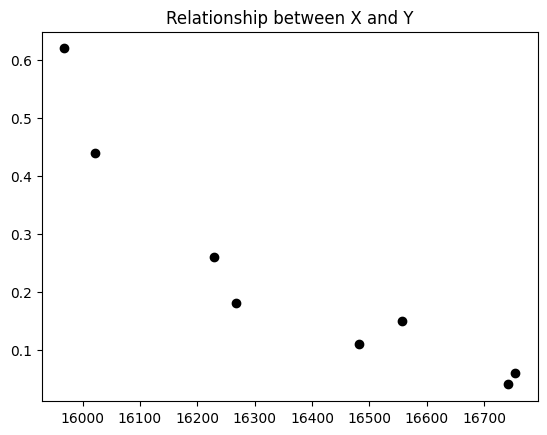

0.21887410284275255

In [103]:
from sklearn import linear_model
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()
X,y = get_train_dataTruth_and_Measured()
X = numpy.array(X).reshape(-1, 1)
y = numpy.array(y).reshape(-1, 1)
if verboser == True:
  plt.title('Relationship between X and Y')
  plt.scatter(X, y,  color='black')
  plt.show()
lm = linear_model.LinearRegression()
lm.fit(X, y)

lm.predict(numpy.array([16400]).reshape(-1, 1))[0][0]


In [104]:
def convert_ppm3_to_alcohol_in_blood(user, alcohol_level, lr_model = lm):
  alcohol_level = lr_model.predict(numpy.array([alcohol_level]).reshape(-1, 1))[0][0]
  blood_qtt = get_blood_qtt(user)
  alcohol_level = round(alcohol_level /blood_qtt,3)
  return alcohol_level

In [ ]:
def get_alcohol_level(user_id): #returns the max value of alcohol measured over a period of 9 seconds
  alcohol_level_ppm3 = int(get_data_from_url(alcohol_level_api))
  alcohol_level = convert_ppm3_to_alcohol_in_blood(user_id, alcohol_level_ppm3)
  return alcohol_level

# Update functions
This one checks if the campus card changes and makes the recommendations (while also updating the bigquery tables)

In [ ]:
def on_user_change(): #Function that checks if the campus card placed on the reader has changed => new user
  initial_user = get_data_from_url(campus_card_uid)
  while True: #repeat this loop until stopped
    send_data_to_url(reset_selection, "None") #ensures no drink is selected (as to avoid the selection being pre-made)
    user_id = get_data_from_url(campus_card_uid) #retrieve the uid of the capuscard located on the reader
    if user_id != initial_user: #checks if our current user has changed
      if user_id != "None" and user_id != "'None'" and user_id != None and user_id != "" and user_id != " " and user_id != "imeou": #ensures the user is not none or an error
        initial_user = user_id #set the initial user to the current user
        verbose("User detected (Yay!!)")
        if not user_exists(user_id): #checks if the user is in our database
          create_user(user_id) #if no user exists creates the user


        #This finds the current alcohol level for the user, it takes the max from our two approximations
        alcohol_level = max(get_alcohol_level(user_id), get_alcohol_per_L_served(user_id))
        send_data_to_url(alcohol_level_setter, alcohol_level) #sends the alcohol level to the second m5Stacks
        
        #sends this to our DB
        verbose("Sending alcohol_level user: {}, level: {}".format(user_id, alcohol_level))
        send_alcohol_level(user_id, alcohol_level)

        #we retrive here the users preference on alcohol limit (mg/L)
        user_data = get_user_data(user_id)
        
        user_limit = user_data['alcohol_limit'].to_list()[-1]
        if user_limit == 0: #we have those "If's" as the user makes a choice by checkbox
          alcohol_limit = 0.0
        elif user_limit == 1:
          alcohol_limit = 0.25
        elif user_limit == 2:
          alcohol_limit = 0.75

        
        current_limit = journalized_limit(user_id, alcohol_limit) #this function automaticaly gets the departure time of the user from SQL
        send_data_to_url(reset_selection, "Non") #message to the m5, indicating that the recommendations are coming
        
        verbose("The current user  has {} L of blood.\nHis alcohol level is {} \nHis journalized limit is {}".format(str(get_blood_qtt(user_id)),str(alcohol_level), str(current_limit)))
        beverage_1, beverage_2, beverage_3,top3, indexes  = recommend_drink(user_id, alcohol_level, current_limit) #we get our top 3 recommendations
        send_data_to_url(drink_recommendation_1, beverage_1)
        send_data_to_url(drink_recommendation_2, beverage_2)
        send_data_to_url(drink_recommendation_3, beverage_3)


        selection = get_data_from_url(selected_drink) #checking if the user has chosen his drink
        while selection == "None" or selection == "on" or selection == "FFLIN" or selection == "Thank" or selection == "You" or selection == "Next" or selection == "imeou" or selection == "ame 'label_selecteddrink_callback' isn't define":
          selection = get_data_from_url(selected_drink)
          zzz.sleep(1)
          verbose(selection)
          
        if selection == "a":
          selection = beverage_1
        elif selection == "b":
          selection = beverage_2
        elif selection == "c":
          selection = beverage_3
        chosen_drink_index = top3.index(selection) #identifying the chosen drink
        drink_id = indexes[chosen_drink_index]
        send_data_to_url(reset_selection, "No")
        send_data_to_url(drink_recommendation_1, "Thank")
        send_data_to_url(drink_recommendation_2, "You")
        send_data_to_url(drink_recommendation_3, "Next")
        verbose("sending_beverage_served user: {}, beverage: {}".format(user_id, selection))
        send_beverage_served(user_id, drink_id) #storing it to our database


In [ ]:
on_user_change()